# Reading zipped files in python with pandas

## Openning a zip file

Following the previous example, let's download a zip file and open it wih pandas.

Let's make sure we have the file we want.

In [1]:
import pandas as pd
from filedownload import download_file

target_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip"
target_file = 'student.zip'

download_file(target_url, output_file=target_file)

File already exists!


Now that we have the file, let's list what the file contains.

In [8]:
import zipfile

# zip_contents is now an object to handle this particular zip file
zip_contents = zipfile.ZipFile(target_file)

zip_contents.namelist()

['student-mat.csv', 'student-por.csv', 'student-merge.R', 'student.txt']

There are 2 csv files, which are what we are interested in. It is always best to read the content of zip files like this. If you read the .txt file you will see that the zip file contains two datasets, one for Portuguese grades, another for Maths grades. Lets just open the maths grades with pandas. 

In [10]:
df = pd.read_csv(zip_contents.open('student-mat.csv'))

In [11]:
df.head()

,school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3
0,"GP;""F"";18;""U"";""GT3"";""A"";4;4;""at_home"";""teacher..."
1,"GP;""F"";17;""U"";""GT3"";""T"";1;1;""at_home"";""other"";..."
2,"GP;""F"";15;""U"";""LE3"";""T"";1;1;""at_home"";""other"";..."
3,"GP;""F"";15;""U"";""GT3"";""T"";4;2;""health"";""services..."
4,"GP;""F"";16;""U"";""GT3"";""T"";3;3;""other"";""other"";""h..."


That didn't go as expected... Pandas is expecting the default separator to be a comma "," and not a semi-colon ";". Lets fix this.

In [12]:
df = pd.read_csv(zip_contents.open('student-mat.csv'), delimiter=";")

In [13]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [39]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

Much better. We can now do an exploration of the data.

---
## Data exploration

How many students from each school and each gender:

In [29]:
df.groupby(by=['school', 'sex'])['age'].count()

school  sex
GP      F      183
        M      166
MS      F       25
        M       21
Name: age, dtype: int64

There are 183 female students from GP and 166 male students from the same school. There are a lot less students from MS.

Let us explore the dataframe a little bit more with seaborn.

In [30]:
import seaborn as sns

<AxesSubplot:xlabel='age', ylabel='count'>

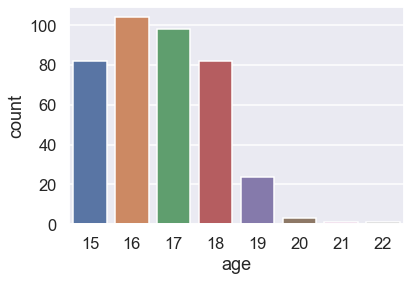

In [31]:
#Check the age distribution
sns.countplot(x="age", data=df)

Lets make the image fancier.

In [51]:
#Fix the image with matplotlib
import matplotlib.pyplot as plt

# import numpy for mathematical manipulations
import numpy as np

#Set the majot plot theme with seaborn (grey background, font type, etc.)
sns.set_theme()

# Adapts image size for slides
sns.set_context("talk")

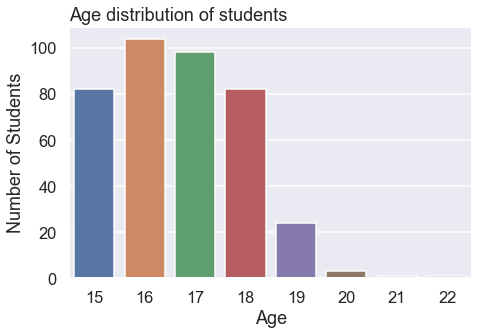

In [33]:
fig, ax = plt.subplots(figsize=(7,5))

sns.countplot(x="age", data=df, ax=ax)

# Set axis ans title
ax.set_xlabel("Age")
ax.set_ylabel("Number of Students")
ax.set_title("Age distribution of students", loc='left')

# Auto-compose the image
plt.tight_layout()
plt.show()

OK, we're ready for the rest of the analysis. we can segment the 

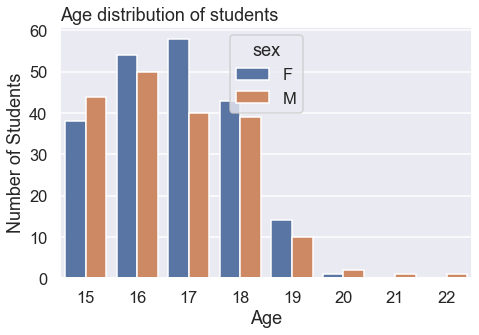

In [35]:
fig, ax = plt.subplots(figsize=(7,5))

sns.countplot(x="age", hue="sex", data=df, ax=ax)

# Set axis ans title
ax.set_xlabel("Age")
ax.set_ylabel("Number of Students")
ax.set_title("Age distribution of students", loc='left')

# Auto-compose the image
plt.tight_layout()
plt.show()

There are more female students in the 16-18 bracket, but the older students tend to be male.

What about grading?

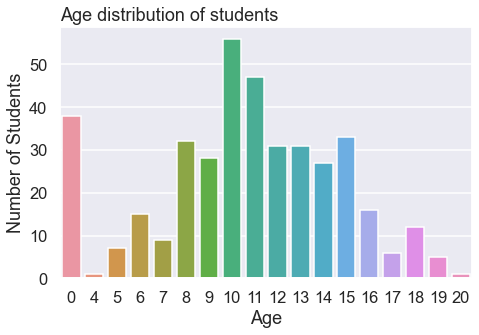

In [37]:
fig, ax = plt.subplots(figsize=(7,5))

sns.countplot(x="G3", data=df, ax=ax)

# Set axis ans title
ax.set_xlabel("Age")
ax.set_ylabel("Number of Students")
ax.set_title("Age distribution of students", loc='left')

# Auto-compose the image
plt.tight_layout()
plt.show()

That's a lot of zeros... that is unfortunate. With some imagination, one can see a gaussian around 10.

Maybe we can see right away what was the main cause of school success with the numerical variables alone.

In [42]:
df.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159,-0.064120,-0.054660


That's a huge table. Maybe we can represent it graphically.

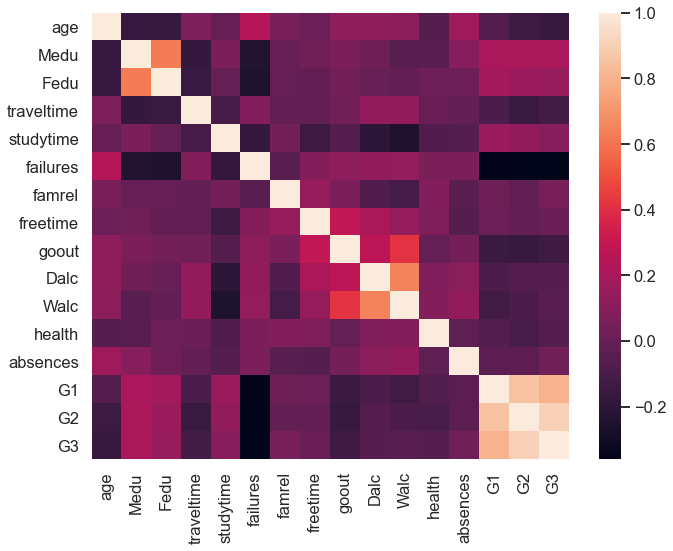

In [46]:
fig, ax = plt.subplots(figsize=(10,8))

sns.heatmap(df.corr())

# Auto-compose the image
plt.tight_layout()
plt.show()

There's positive and negative values. And since it is a correlation matrix, information is duplicated. Let's use an appropriate colormap (divergent) and only the parts of the matrix we're interested in.

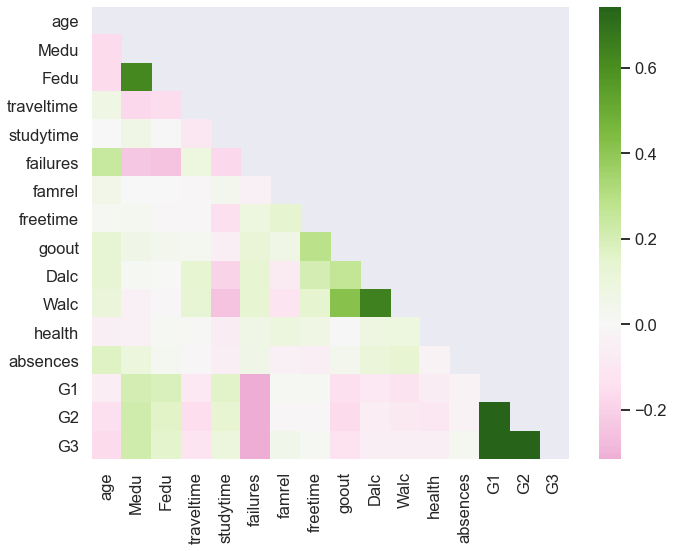

In [54]:
fig, ax = plt.subplots(figsize=(10,8))

# Let's plot only the bottom half of the matrix
correlation_matrix = df.corr()

mask = np.zeros_like(correlation_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(correlation_matrix, mask=mask, cmap='PiYG', center=0, robust=True)

# Auto-compose the image
plt.tight_layout()
plt.show()

We reach 3 important conclusions:
1. The father's and mother's education are highly correlated. Since the mother's education is correlated positively with grading, we assume houshold education is a significant factor on the students' academic outcome.
2. Alchool consumption by the student is very corelated between workdays and weekend days. Students tend to drink during the entire week. Alchool consumption is also negatively correlated tih the mother's education.
3. Grading from G1, G2, and G3 are very positively correlated. They are also negatively correlated with past failures. The students with more educated households getting better grades. it also means the schools are not being able to redeem failling students.

This simple analysis with a simple dataset shows you right away that society has large imbalancements in need of being corrected.

What else can you do in this analysis, now that you have the file?